In [2]:
#importing all the packages that I might need
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [111]:
data_grad = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='All',header=8)
data_ell = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='ELL',header=8)
data_swd = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='SWD',header=8)
data_ethnicity = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Ethnicity',header=8)
data_gender = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Gender',header=8)
data_poverty = pd.read_excel('graduation_rates_public_school.xlsx',sheet_name='Poverty',header=8)

In [112]:
df_created = [data_ell,data_swd,data_ethnicity,data_gender,data_poverty]

In [113]:
data_grad.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,...,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,All Students,2014,4 year August,29,28,0.965517,25,86.2069,...,25,86.2069,89.2857,3,10.3448,10.7143,0,0,1,3.44828
1,01M292,Orchard Collegiate Academy,All Students,2013,4 year August,36,25,0.694444,23,63.8889,...,23,63.8889,92,2,5.55556,8,3,8.33333,7,19.4444
2,01M292,Orchard Collegiate Academy,All Students,2012,4 year August,44,24,0.545455,20,45.4545,...,19,43.1818,79.1667,4,9.09091,16.6667,10,22.7273,10,22.7273
3,01M292,Orchard Collegiate Academy,All Students,2011,4 year August,73,46,0.630137,41,56.1644,...,41,56.1644,89.1304,5,6.84932,10.8696,18,24.6575,7,9.58904
4,01M292,Orchard Collegiate Academy,All Students,2010,4 year August,61,26,0.426230,26,42.623,...,25,40.9836,96.1538,0,0,0,18,29.5082,17,27.8689


In [114]:
data_grad.columns

Index(['DBN', 'School Name', 'Category', 'Cohort Year', 'Cohort', '#', '#.1',
       '% of cohort', '#.2', '% of cohort.1', '% of grads', '#.3',
       '% of cohort.2', '% of grads.1', '#.4', '% of cohort.3', '% of grads.2',
       '#.5', '% of cohort.4', '% of grads.3', '#.6', '% of cohort.5', '#.7',
       '% of cohort.6'],
      dtype='object')

In [115]:
data_ell.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,...,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,ELL,2014,4 year August,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,01M292,Orchard Collegiate Academy,ELL,2013,4 year August,2,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
2,01M292,Orchard Collegiate Academy,ELL,2012,4 year August,6,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
3,01M292,Orchard Collegiate Academy,ELL,2011,4 year August,14,3,21.4286,1,7.14286,...,1,7.14286,33.3333,2,14.2857,66.6667,8,57.1429,2,14.2857
4,01M292,Orchard Collegiate Academy,ELL,2010,4 year August,14,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s


In [7]:
data_swd.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,...,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,Not SWD,2014,4 year August,21,21,100,21,100,...,21,100,100,0,0,0,0,0,0,0
1,01M292,Orchard Collegiate Academy,Not SWD,2013,4 year August,24,19,79.1667,19,79.1667,...,19,79.1667,100,0,0,0,1,4.16667,4,16.6667
2,01M292,Orchard Collegiate Academy,Not SWD,2012,4 year August,31,19,61.2903,18,58.0645,...,17,54.8387,89.4737,1,3.22581,5.26316,5,16.129,7,22.5806
3,01M292,Orchard Collegiate Academy,Not SWD,2011,4 year August,53,39,73.5849,38,71.6981,...,38,71.6981,97.4359,1,1.88679,2.5641,10,18.8679,3,5.66038
4,01M292,Orchard Collegiate Academy,Not SWD,2010,4 year August,47,25,53.1915,25,53.1915,...,24,51.0638,96,0,0,0,10,21.2766,12,25.5319


In [8]:
data_ethnicity.tail()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,...,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
98095,32K564,Bushwick Community High School,White,2006,6 year June,5,2,40,0,0,...,0,0,0,2,40,100,0,0,2,40
98096,32K564,Bushwick Community High School,White,2005,6 year June,2,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
98097,32K564,Bushwick Community High School,White,2003,6 year June,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
98098,32K564,Bushwick Community High School,White,2002,6 year June,2,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
98099,32K564,Bushwick Community High School,White,2001,6 year June,2,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s


In [116]:
data_grad_2014 = data_grad[data_grad['Cohort Year'] == 2014]
data_grad_2014 = data_grad_2014[data_grad_2014['Cohort'] == '4 year August']

In [117]:
data_grad_2014.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,...,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,All Students,2014,4 year August,29,28,0.965517,25,86.2069,...,25,86.2069,89.2857,3,10.3448,10.7143,0,0,1,3.44828
51,01M448,University Neighborhood High School,All Students,2014,4 year August,88,82,0.931818,74,84.0909,...,54,61.3636,65.8537,8,9.09091,9.7561,3,3.40909,3,3.40909
108,01M450,East Side Community School,All Students,2014,4 year August,92,89,0.967391,89,96.7391,...,89,96.7391,100,0,0,0,2,2.17391,1,1.08696
165,01M458,Forsyth Satellite Academy,All Students,2014,4 year August,73,27,0.369863,25,34.2466,...,25,34.2466,92.5926,2,2.73973,7.40741,34,46.5753,12,16.4384
205,01M509,Marta Valle High School,All Students,2014,4 year August,42,27,0.642857,13,30.9524,...,12,28.5714,44.4444,14,33.3333,51.8519,6,14.2857,8,19.0476


In [118]:
len(data_grad_2014)

479

In [119]:
data_grad_2014 = data_grad_2014[['DBN','School Name','#','% of cohort']].reset_index()
data_grad_2014.head()

,index,DBN,School Name,#,% of cohort
0,0,01M292,Orchard Collegiate Academy,29,0.965517
1,51,01M448,University Neighborhood High School,88,0.931818
2,108,01M450,East Side Community School,92,0.967391
3,165,01M458,Forsyth Satellite Academy,73,0.369863
4,205,01M509,Marta Valle High School,42,0.642857


In [120]:
data_grad_2014 = data_grad_2014[['DBN','School Name','#','% of cohort']]
data_grad_2014.head()

,DBN,School Name,#,% of cohort
0,01M292,Orchard Collegiate Academy,29,0.965517
1,01M448,University Neighborhood High School,88,0.931818
2,01M450,East Side Community School,92,0.967391
3,01M458,Forsyth Satellite Academy,73,0.369863
4,01M509,Marta Valle High School,42,0.642857


In [38]:
data_ell.tail()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,...,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
57745,32K564,Bushwick Community High School,Not ELL,2005,6 year June,199,61,30.6533,24,12.0603,...,24,12.0603,39.3443,37,18.593,60.6557,26,13.0653,108,54.2714
57746,32K564,Bushwick Community High School,Not ELL,2004,6 year June,178,47,26.4045,14,7.86517,...,14,7.86517,29.7872,33,18.5393,70.2128,27,15.1685,97,54.4944
57747,32K564,Bushwick Community High School,Not ELL,2003,6 year June,137,40,29.1971,5,3.64964,...,5,3.64964,12.5,35,25.5474,87.5,17,12.4088,79,57.6642
57748,32K564,Bushwick Community High School,Not ELL,2002,6 year June,170,58,34.1176,1,0.588235,...,1,0.588235,1.72414,57,33.5294,98.2759,24,14.1176,87,51.1765
57749,32K564,Bushwick Community High School,Not ELL,2001,6 year June,148,59,39.8649,0,0,...,0,0,0,59,39.8649,100,18,12.1622,69,46.6216


In [121]:
#Create a function to clean the dataframes from the different excel sheets

def my_cleaner(dataframe):
#select year 2014 and cohort 4 year August
    dataframe = dataframe[dataframe['Cohort Year'] == 2014]
    dataframe = dataframe[dataframe['Cohort'] == '4 year August']
#keep only 3 columns from the dataframes  
    cols = [col for col in dataframe.columns if col in ['DBN','Category','#']]
    dataframe = dataframe[cols]
#transform the categories into columns
    dataframe = dataframe.groupby(['DBN','Category'])['#'].aggregate('first').unstack()
#due to columns removal - reset the index
    dataframe = dataframe.reset_index()
    return dataframe

In [122]:
data_ell.head()

,DBN,School Name,Category,Cohort Year,Cohort,#,#.1,% of cohort,#.2,% of cohort.1,...,#.4,% of cohort.3,% of grads.2,#.5,% of cohort.4,% of grads.3,#.6,% of cohort.5,#.7,% of cohort.6
0,01M292,Orchard Collegiate Academy,ELL,2014,4 year August,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,01M292,Orchard Collegiate Academy,ELL,2013,4 year August,2,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
2,01M292,Orchard Collegiate Academy,ELL,2012,4 year August,6,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
3,01M292,Orchard Collegiate Academy,ELL,2011,4 year August,14,3,21.4286,1,7.14286,...,1,7.14286,33.3333,2,14.2857,66.6667,8,57.1429,2,14.2857
4,01M292,Orchard Collegiate Academy,ELL,2010,4 year August,14,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s


In [123]:
test = my_cleaner(data_ell)

In [124]:
test.head()

Category,DBN,ELL,Former ELL,Not ELL
0,01M292,1.0,3.0,25.0
1,01M448,1.0,9.0,78.0
2,01M450,NaN,1.0,91.0
3,01M458,6.0,4.0,63.0
4,01M509,2.0,1.0,39.0


In [125]:
dataframes_to_merge=[my_cleaner(df) for df in df_created]
len(dataframes_to_merge)

5

In [178]:
dataset = data_grad_2014
for x in range(5):
    dataset = dataset.merge(dataframes_to_merge[x],on = 'DBN',how = 'inner')

In [179]:
dataset.head()

,DBN,School Name,#,% of cohort,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0


In [180]:
len(dataset)

479

In [181]:
dataset = dataset.rename(columns={'#':'total_stud','% of cohort':'grad_rate'})

In [182]:
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0


In [183]:
dataset.describe()

,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
count,479.000000,475.000000,388.000000,419.000000,479.000000,478.000000,469.000000,401.000000,471.000000,475.000000,242.000000,230.000000,405.000000,476.000000,468.000000,479.000000,474.000000
mean,150.513570,0.741041,16.092784,11.579952,127.348643,127.420502,23.857143,32.344140,41.050955,59.298947,4.049587,2.782609,24.701235,74.199580,78.583333,112.469729,38.445148
std,179.989735,0.229672,26.756663,18.817435,159.607015,161.375680,24.016173,86.267846,38.718591,58.126908,5.621316,4.330823,67.081760,88.841409,97.258940,126.245206,66.273651
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,79.000000,0.677836,3.000000,3.000000,63.000000,64.000000,12.000000,2.000000,18.000000,22.500000,1.000000,1.000000,2.000000,35.000000,38.000000,61.500000,10.000000
50%,99.000000,0.795082,6.000000,5.000000,86.000000,80.500000,19.000000,6.000000,30.000000,48.000000,2.000000,2.000000,4.000000,49.000000,50.000000,80.000000,18.000000
75%,126.000000,0.901220,16.000000,11.000000,114.000000,107.750000,26.000000,23.000000,50.500000,71.500000,4.000000,3.000000,18.000000,68.000000,69.000000,100.000000,34.750000
max,1322.000000,1.000000,184.000000,144.000000,1308.000000,1298.000000,170.000000,830.000000,276.000000,390.000000,39.000000,37.000000,808.000000,577.000000,800.000000,861.000000,645.000000


In [184]:
dataset.dtypes

DBN                 object
School Name         object
total_stud           int64
grad_rate          float64
ELL                float64
Former ELL         float64
Not ELL            float64
Not SWD            float64
SWD                float64
Asian              float64
Black              float64
Hispanic           float64
Multi-Racial       float64
Native American    float64
White              float64
Female             float64
Male               float64
Econ Disadv        float64
Not Econ Disadv    float64
dtype: object

In [185]:
#remove missing or incorrect value in grad_rate to keep only numeric
dataset=dataset[pd.to_numeric(dataset.grad_rate, errors='coerce').notnull()]

In [186]:
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,Multi-Racial,Native American,White,Female,Male,Econ Disadv,Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,6.0,19.0,NaN,NaN,1.0,6.0,23.0,27.0,2.0
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,19.0,42.0,1.0,1.0,2.0,38.0,50.0,77.0,11.0
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,19.0,52.0,4.0,NaN,10.0,40.0,52.0,62.0,30.0
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,25.0,41.0,1.0,NaN,5.0,47.0,26.0,65.0,8.0
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,12.0,27.0,NaN,NaN,1.0,20.0,22.0,41.0,1.0


In [187]:
len(dataset)

475

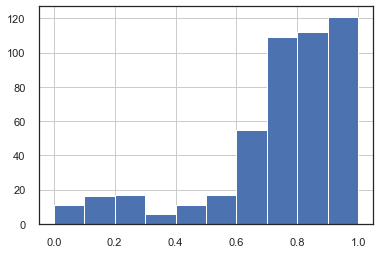

In [188]:
dataset.grad_rate.hist()

In [189]:
dataset.grad_rate.describe()

count    475.000000
mean       0.741041
std        0.229672
min        0.000000
25%        0.677836
50%        0.795082
75%        0.901220
max        1.000000
Name: grad_rate, dtype: float64

In [190]:
columns_tobe_changed = list(dataset.columns)[4:]
columns_tobe_changed

['ELL',
 'Former ELL',
 'Not ELL',
 'Not SWD',
 'SWD',
 'Asian',
 'Black',
 'Hispanic',
 'Multi-Racial',
 'Native American',
 'White',
 'Female',
 'Male',
 'Econ Disadv',
 'Not Econ Disadv']

In [191]:
new_cols = ['prob_'+x for x in columns_tobe_changed]
new_cols

['prob_ELL',
 'prob_Former ELL',
 'prob_Not ELL',
 'prob_Not SWD',
 'prob_SWD',
 'prob_Asian',
 'prob_Black',
 'prob_Hispanic',
 'prob_Multi-Racial',
 'prob_Native American',
 'prob_White',
 'prob_Female',
 'prob_Male',
 'prob_Econ Disadv',
 'prob_Not Econ Disadv']

In [192]:
dataset[new_cols] = round(dataset[columns_tobe_changed].div(dataset.total_stud, axis=0),2)
dataset.head()

,DBN,School Name,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,...,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
0,01M292,Orchard Collegiate Academy,29,0.965517,1.0,3.0,25.0,21.0,8.0,3.0,...,0.10,0.21,0.66,NaN,NaN,0.03,0.21,0.79,0.93,0.07
1,01M448,University Neighborhood High School,88,0.931818,1.0,9.0,78.0,75.0,13.0,23.0,...,0.26,0.22,0.48,0.01,0.01,0.02,0.43,0.57,0.88,0.12
2,01M450,East Side Community School,92,0.967391,NaN,1.0,91.0,76.0,16.0,7.0,...,0.08,0.21,0.57,0.04,NaN,0.11,0.43,0.57,0.67,0.33
3,01M458,Forsyth Satellite Academy,73,0.369863,6.0,4.0,63.0,56.0,17.0,1.0,...,0.01,0.34,0.56,0.01,NaN,0.07,0.64,0.36,0.89,0.11
4,01M509,Marta Valle High School,42,0.642857,2.0,1.0,39.0,25.0,17.0,2.0,...,0.05,0.29,0.64,NaN,NaN,0.02,0.48,0.52,0.98,0.02


In [193]:
dataset.describe()

,total_stud,grad_rate,ELL,Former ELL,Not ELL,Not SWD,SWD,Asian,Black,Hispanic,...,prob_Asian,prob_Black,prob_Hispanic,prob_Multi-Racial,prob_Native American,prob_White,prob_Female,prob_Male,prob_Econ Disadv,prob_Not Econ Disadv
count,475.000000,475.000000,388.000000,419.000000,475.000000,475.000000,468.000000,401.000000,467.000000,474.000000,...,401.000000,467.000000,474.000000,242.000000,230.000000,405.000000,472.000000,467.000000,475.000000,474.000000
mean,151.766316,0.741041,16.092784,11.579952,128.406316,128.212632,23.905983,32.344140,41.389722,59.421941,...,0.119352,0.350642,0.448165,0.025083,0.018565,0.100148,0.498602,0.513169,0.785916,0.214536
std,180.225826,0.229672,26.756663,18.817435,159.859673,161.575782,24.018545,86.267846,38.709800,58.126413,...,0.146856,0.245137,0.245225,0.022282,0.022932,0.134578,0.140571,0.130824,0.137550,0.137342
min,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.010000,0.000000,0.030000,0.000000,0.000000,0.000000,0.060000,0.070000,0.210000,0.010000
25%,79.000000,0.677836,3.000000,3.000000,64.000000,65.000000,12.000000,2.000000,18.000000,23.000000,...,0.020000,0.170000,0.230000,0.010000,0.010000,0.020000,0.430000,0.440000,0.740000,0.120000
50%,100.000000,0.795082,6.000000,5.000000,86.000000,81.000000,19.000000,6.000000,30.000000,48.000000,...,0.060000,0.280000,0.460000,0.020000,0.010000,0.040000,0.490000,0.510000,0.810000,0.190000
75%,126.500000,0.901220,16.000000,11.000000,114.000000,108.000000,26.000000,23.000000,51.000000,71.750000,...,0.150000,0.470000,0.640000,0.030000,0.020000,0.120000,0.570000,0.580000,0.880000,0.260000
max,1322.000000,1.000000,184.000000,144.000000,1308.000000,1298.000000,170.000000,830.000000,276.000000,390.000000,...,0.880000,0.960000,1.000000,0.200000,0.280000,0.790000,1.000000,1.000000,1.000000,0.790000


/Users/fabricemesidor/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


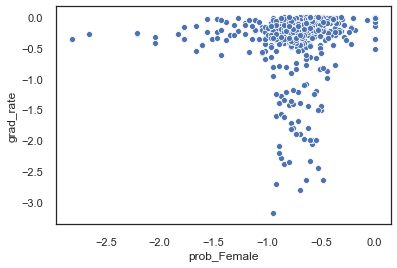

In [197]:
sns.scatterplot(dataset['prob_Female'], dataset.grad_rate)

In [199]:
dataset.columns

Index(['DBN', 'School Name', 'total_stud', 'grad_rate', 'ELL', 'Former ELL',
       'Not ELL', 'Not SWD', 'SWD', 'Asian', 'Black', 'Hispanic',
       'Multi-Racial', 'Native American', 'White', 'Female', 'Male',
       'Econ Disadv', 'Not Econ Disadv', 'prob_ELL', 'prob_Former ELL',
       'prob_Not ELL', 'prob_Not SWD', 'prob_SWD', 'prob_Asian', 'prob_Black',
       'prob_Hispanic', 'prob_Multi-Racial', 'prob_Native American',
       'prob_White', 'prob_Female', 'prob_Male', 'prob_Econ Disadv',
       'prob_Not Econ Disadv'],
      dtype='object')

In [203]:
variables = new_cols
variables

['prob_ELL',
 'prob_Former ELL',
 'prob_Not ELL',
 'prob_Not SWD',
 'prob_SWD',
 'prob_Asian',
 'prob_Black',
 'prob_Hispanic',
 'prob_Multi-Racial',
 'prob_Native American',
 'prob_White',
 'prob_Female',
 'prob_Male',
 'prob_Econ Disadv',
 'prob_Not Econ Disadv']

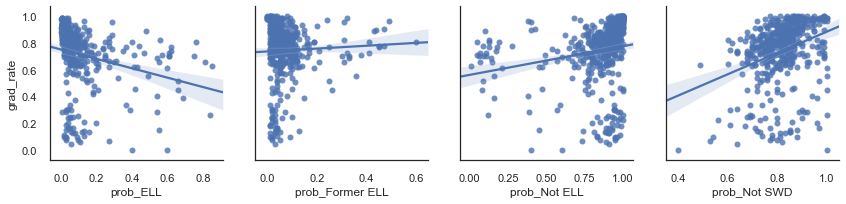

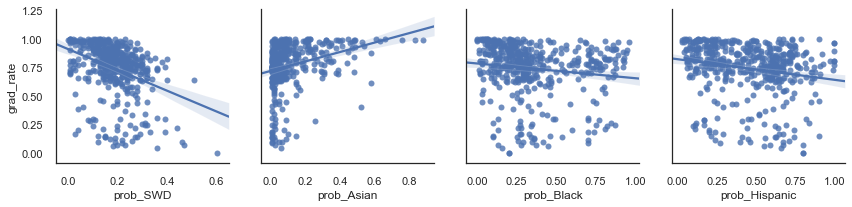

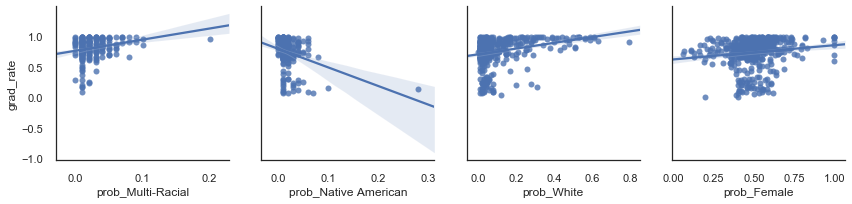

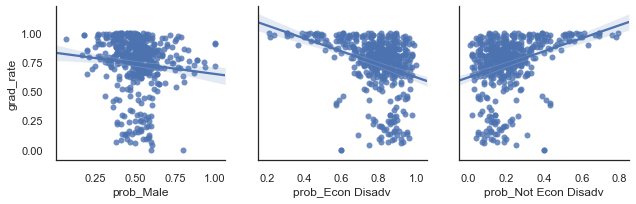

In [205]:
n = 4
row_groups= [variables[i:i+n] for i in range(0, len(variables), n) ]
for i in row_groups:
    pp = sns.pairplot(data=dataset, y_vars=['grad_rate'],x_vars=i, kind="reg", height=3)